# Data Analytics Final Project:
- Luis Ángel Sedas Díaz
- Mario Chávez

In [93]:
%run .\DA-cleaning.ipynb

  Grupo Virtual  ID_Prof
0            NO    15780
  SNI  ID_Prof  porcentaje
0   1      827    5.240479
1   2      272    1.723592
2   3       95    0.601990
3   C      338    2.141816


Base de datos de 15781 registros

Plan:
- Hacer una variable de clasificación (bueno/malo) para cada profesor. Debemos de generar un criterio de que es considerado bueno, en base a las 3 respuestas de la ECOA.
- Encontrar que variables son las que impactan más a las respuestas de la ECOA.
- Una vez que conozco las variables que predicen mejor el performance. Aplicar clustering para ver si los individuos poseen características similares, respecto a lo deseado.

# Data Exploration

In [20]:
#Condiciones
c1 = data['Campus']=='Campus Monterrey';
c2 = data['División'] == 'IN - Esc. Ingeniería y Ciencias'
c3 = data['sni_sn'] == 'SNI'
c4 = data['mxn_sn'] = 'Mexicano'

## Clase de Posgrado vs Profesional 

C:\Users\luiss\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Profesional : 9.021163661109233
Posgrado : 9.451841085271314


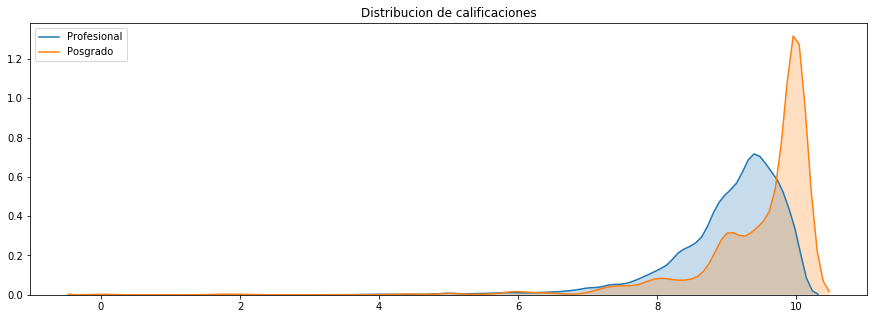

In [21]:
fig, ax = plt.subplots(figsize=(15,5))
ax.grid(False)

for index,value in enumerate(data['prof_sn'].unique()):
    sns.kdeplot( data[data['prof_sn']==value]['calif'].dropna(), label=value,shade = True)
    print(value,':', data[data['prof_sn']==value]['calif'].dropna().mean())

plt.title('Distribucion de calificaciones')
plt.legend()
plt.show()

## Hombre o Mujer
La distribución es prácticamente la misma, cuando se consideran todos los profesores, por lo que en este caso la variable de género no presenta una diferencia

In [19]:
#Cantidad de hombres y mujeres profesores
prof_genero = data[['Género','ID_Prof']].groupby(['Género'],as_index=False).count()
prof_genero['porcentaje'] = prof_genero['ID_Prof']/len(data)*100
prof_genero

,Género,ID_Prof,porcentaje
0,Femenino,6243,39.560231
1,Masculino,9538,60.439769


Femenino : 9.054748513578694
Masculino : 9.045938552188607


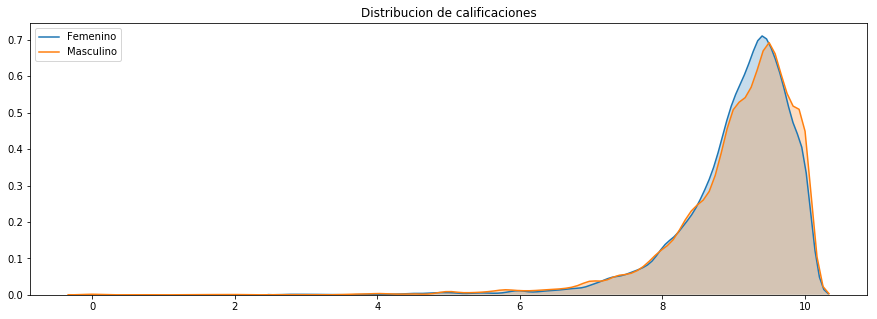

In [175]:
fig, ax = plt.subplots(figsize=(15,5))
ax.grid(False)

for index,value in enumerate(data['Género'].unique()):
    sns.kdeplot( data[data['Género']==value]['calif'].dropna(), label=value,shade = True)
    print(value,':', data[data['Género']==value]['calif'].dropna().mean())

plt.title('Distribucion de calificaciones')
plt.legend()
plt.show()

## Mexicano o Extranjero
La distribución es casi la misma, recordando que el 94.2% de los profesores son mexicanos


Mexicano : 9.049021460386019
Extranjero : 9.055995599559955


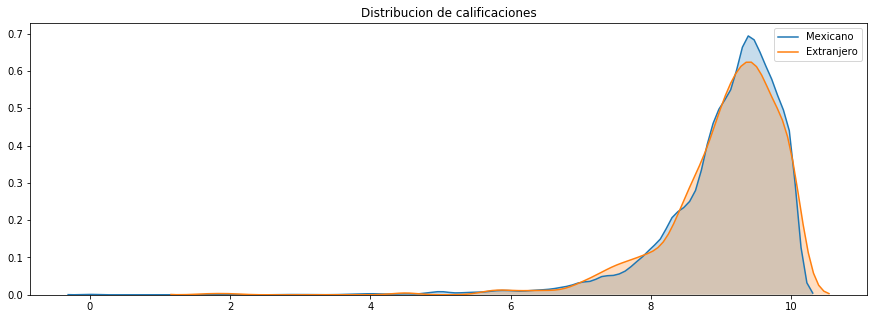

In [173]:
fig, ax = plt.subplots(figsize=(15,5))
ax.grid(False)

for index,value in enumerate(data['mxn_sn'].unique()):
    sns.kdeplot( data[data['mxn_sn']==value]['calif'].dropna(), label=value,shade = True)
    print(value,':', data[data['mxn_sn']==value]['calif'].dropna().mean())

plt.title('Distribucion de calificaciones')
plt.legend()
plt.show()

## SNI vs Profesores

NO SNI : 9.019594737212433
SNI : 9.32945838837516


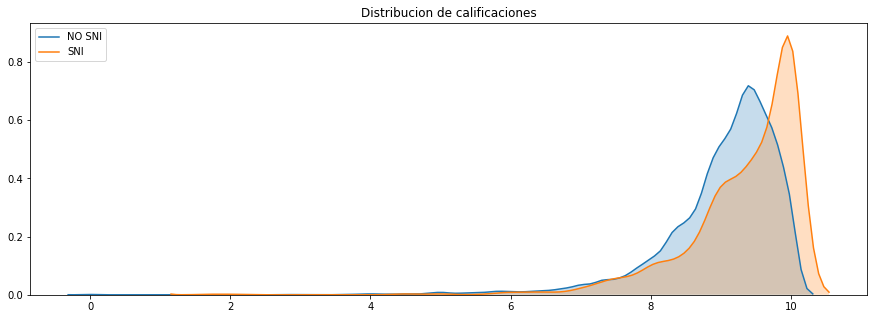

In [168]:
fig, ax = plt.subplots(figsize=(15,5))
ax.grid(False)

for index,value in enumerate(data['sni_sn'].unique()):
    sns.kdeplot( data[data['sni_sn']==value]['calif'].dropna(), label=value,shade = True)
    print(value,':', data[data['sni_sn']==value]['calif'].dropna().mean())

plt.title('Distribucion de calificaciones')
plt.legend()
plt.show()

## Nivel estudio profesor
Hay tres niveles de estudio: Profesional, Maestría y Doctorado. Considerando todos los campus.

Doctorado : 9.097815490160714
Maestría : 9.02206466250711
Profesional : 9.03047690014901
nan : nan


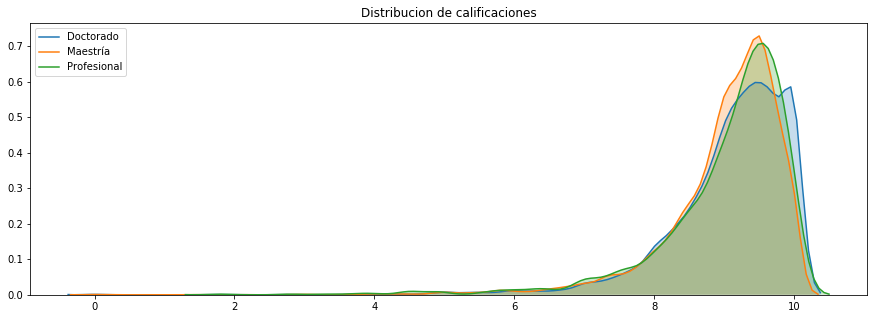

In [157]:
fig, ax = plt.subplots(figsize=(15,5))
ax.grid(False)

for index,value in enumerate(data['Grado Máximo Prof'].unique()):
    sns.kdeplot( data[data['Grado Máximo Prof']==value]['calif'].dropna(), label=value,shade = True)
    print(value,':', data[data['Grado Máximo Prof']==value]['calif'].dropna().mean())

plt.title('Distribucion de calificaciones')
plt.legend()
plt.show()

## Análisis de Datos (Campus MTY)
Comenzaremos el análisis con únicamente un Campus Mty, que representa el 27% de los datos.

In [191]:
profesores_por_campus = data[['Campus','ID_Prof']].groupby(['Campus'],as_index=False).count()
profesores_por_campus['porcentaje'] = profesores_por_campus['ID_Prof']/len(data)*100
profesores_por_campus = profesores_por_campus.sort_values(['ID_Prof'],ascending=False)
profesores_por_campus.head()

,Campus,ID_Prof,porcentaje
13,Campus Monterrey,4311,27.317660
5,Campus Ciudad de México,1545,9.790254
8,Campus Guadalajara,1528,9.682530
7,Campus Estado de México,1295,8.206071
17,Campus Querétaro,1068,6.767632


Las variables seleccionadas para este primer análisis son:
- sni_sn (posteriormente podríamos incluir el nivel de sni)
- prof_sn (profesional o posgrado)
- calif (posteriormente se podría incluir la respuesta de cada pregunta)

In [22]:
data_mty = data[c1].copy()
data_mty.calif.describe()

count    4301.000000
mean        9.070821
std         0.799713
min         0.000000
25%         8.800000
50%         9.200000
75%         9.600000
max        10.000000
Name: calif, dtype: float64

El 50% de los profesores están por debajo de 9.2, por lo que llamaremos a estos como profesores ***"malos"***.
Creamos un df temporal de profesores de campus MTY, en donde agregaremos la columna de bueno o malo (bueno_sn)

C:\Users\luiss\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\luiss\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


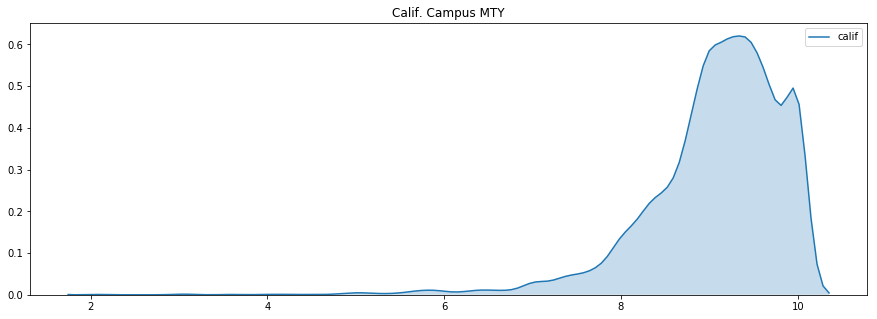

In [79]:
a = [];
for index,value in enumerate(data_mty.calif):
    if value <= data_mty.calif.describe()['50%']:
        a.append('malo')
    else:
        a.append('bueno')
data_mty['bueno_sn'] = a;

fig, ax = plt.subplots(figsize=(15,5))
ax.grid(False)
sns.kdeplot( data_mty.loc[data_mty.calif != 0,'calif'], shade = True)
plt.title('Calif. Campus MTY')
plt.show()

In [271]:
def correlations_barplot(y_index,values_cor,title):
    sns.set(style="whitegrid")
    plt.clf()
    fig, ax = plt.subplots(figsize=(17,3))
    sns.barplot(y = y_index, x = values_cor, orient='h')
    plt.title(title)
    plt.yticks(fontsize=10)
    plt.show

<Figure size 432x288 with 0 Axes>

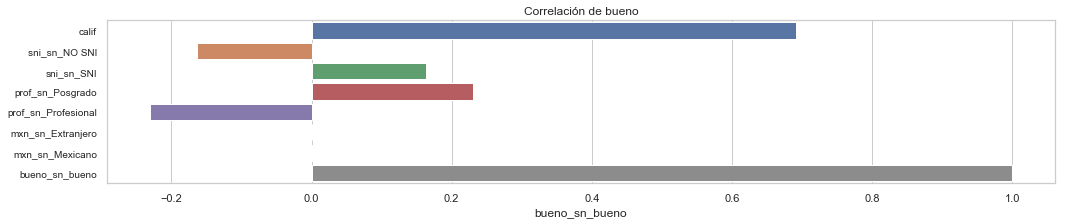

In [298]:
# Barplot de correlaciones de variables económicas contra la cantidad de cajeros a 300m
cor_temp = pd.get_dummies(data_mty[['sni_sn','prof_sn','mxn_sn','calif','bueno_sn']]).drop(['bueno_sn_malo'],axis=1).corr()
title = 'Correlación de bueno'

y_index = cor_temp.index
values_cor = cor_temp['bueno_sn_bueno']

correlations_barplot(y_index,values_cor,title)

Lo que nos dice las correlaciones anteriores es que un profesor investigador (SNI) o que de clases de posgrado tiene una correlación positiva con ser calificado como bueno. Mientras que una negativa con ser calificado como malo con no ser investigador y dar clases de profesional. La variable de nacionalidad presenta una correlación 0.

¿Cuántos SNIs dan clases en profesional o posgrado?

In [356]:
sni_prof = data_mty[['sni_sn','ID_Prof','prof_sn']].groupby(['sni_sn','prof_sn'],as_index = False).count()
a = [];
for index,value in enumerate(sni_prof.sni_sn):
    a.append(sni_prof['ID_Prof'][index]/ len(data_mty[data_mty.sni_sn == sni_prof.sni_sn[index]])*100)
sni_prof['porcentaje'] = a 
sni_prof

,sni_sn,prof_sn,ID_Prof,porcentaje
0,NO SNI,Posgrado,74,2.119129
1,NO SNI,Profesional,3418,97.880871
2,SNI,Posgrado,368,44.932845
3,SNI,Profesional,451,55.067155


De la tabla anterior podemos ver que prácticamente todos los profesores no investiadores dan clases en profesional (97%). Mientras que los profesores investigadores están cerca del 50%

In [337]:
buenos_posgrado = data_mty[['bueno_sn','prof_sn','ID_Prof']].groupby(['bueno_sn','prof_sn'],as_index=False).count()
buenos_posgrado['porcentaje'] = buenos_posgrado['ID_Prof']/len(data_mty)*100
buenos_posgrado

,bueno_sn,prof_sn,ID_Prof,porcentaje
0,bueno,Posgrado,359,8.327534
1,bueno,Profesional,1671,38.761308
2,malo,Posgrado,83,1.925307
3,malo,Profesional,2198,50.985850


Para el caso de clases de Profesional y Posgrado se nota una relación más significativa. El 80% de las profesores de clases de Posgrado poseen calificaciones positivas, mientteas que para las clases de profesional se mantiene la distribución de cerca del 50% (43% son buenos), con mayor cantidad de calificaciones malas.

In [358]:
buenos_sni_posgrado = data_mty[['sni_sn','bueno_sn','prof_sn','ID_Prof']].groupby(['sni_sn','bueno_sn','prof_sn'],as_index=False).count()
buenos_sni_posgrado['porcentaje'] = buenos_sni_posgrado['ID_Prof']/len(data_mty)*100
buenos_sni_posgrado

,sni_sn,bueno_sn,prof_sn,ID_Prof,porcentaje
0,NO SNI,bueno,Posgrado,56,1.299003
1,NO SNI,bueno,Profesional,1450,33.634887
2,NO SNI,malo,Posgrado,18,0.417537
3,NO SNI,malo,Profesional,1968,45.650661
4,SNI,bueno,Posgrado,303,7.028532
5,SNI,bueno,Profesional,221,5.126421
6,SNI,malo,Posgrado,65,1.507771
7,SNI,malo,Profesional,230,5.335189


Si SNI y bueno 64.7%. Esto nos dice que cerca de 2/3 de los investigadores son calificados como buenos

No SNI y bueno 43.12%. Esto nos dice que predominan las calificaciones malas para profesores



Si SNI y de profesional 55.06%. Esto nos dice que los investigadores dan clases tanto de prof. como de posgrado de manera equilibrada

No SNI y de profesional 97.88%. Esto nos dice que los profesores predominan en las clases de profesional



Si SNI, posgrado y bueno 82%

Si SNI, profesional y bueno 38%

No SNI, posgrado y bueno 76%

No SNI, profesional y bueno 42%

Veemos que en general los alumnos de posgrado califican mejor que los de profesional, independientemente de si son SNI o no. 

- Que características comparten los SNI buenos

- Que características comparten los profesores buenos

In [91]:
%run .\DA-cleaning.ipynb

helo


In [92]:
#